## PCA - Principle Component Analysis

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
file = 'Country-data.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

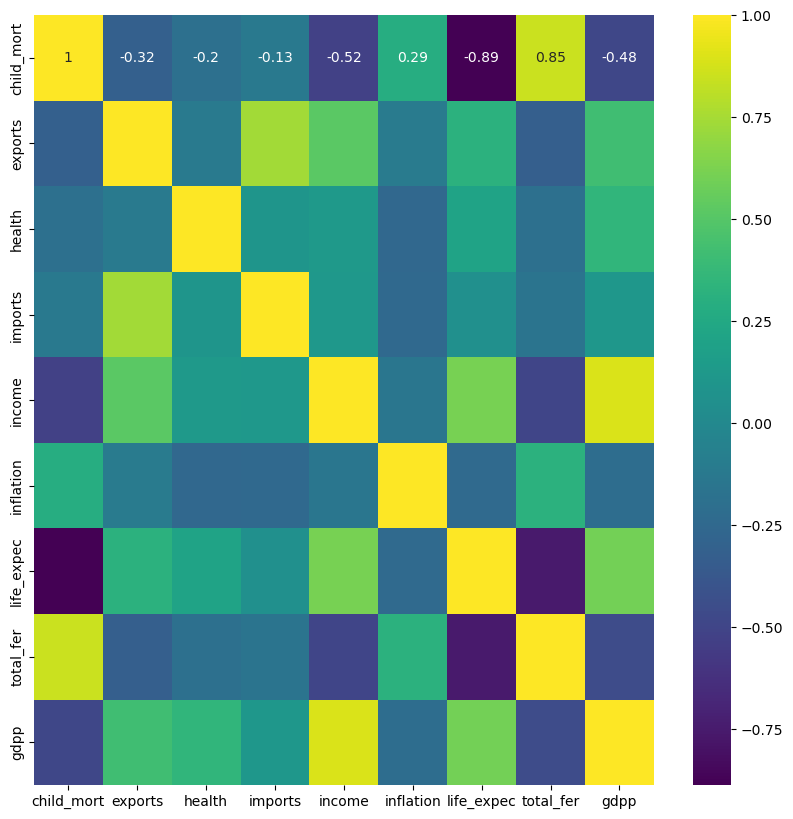

In [4]:
correlation = df.corr()

plt.figure(figsize=(10, 10))  # Size figures

sns.heatmap(correlation, annot=True, cmap='viridis')


 **Store the column 'life_expec' in a new object life and to delete it from df**

In [5]:
life = df.life_expec
df = df.drop('life_expec', axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Creation of instance StandardScaler

Z = scaler.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA

pca = PCA()  # Creation of instance PCA

Coord = pca.fit_transform(Z)  # Calculation of the coordinates of the PCA

The eigenvalues are : [3.47458859 1.47472545 1.16119407 0.9451269  0.65473206 0.1516013
 0.11408199 0.07214241]


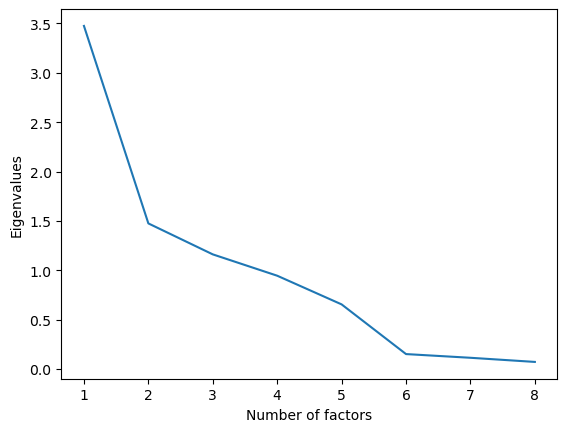

In [9]:
print('The eigenvalues are :', pca.explained_variance_)

plt.plot(np.arange(1, 9), pca.explained_variance_)

plt.xlabel('Number of factors')

plt.ylabel('Eigenvalues');


Ratio : [0.43172283 0.18323684 0.1442801  0.11743343 0.08135144 0.01883669
 0.01417486 0.0089638 ]


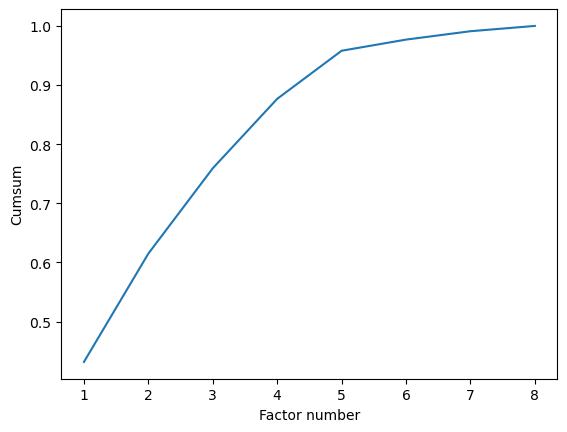

In [10]:
print('Ratio :',pca.explained_variance_ratio_)

plt.plot(np.arange(1,9),np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Factor number')

plt.ylabel('Cumsum');


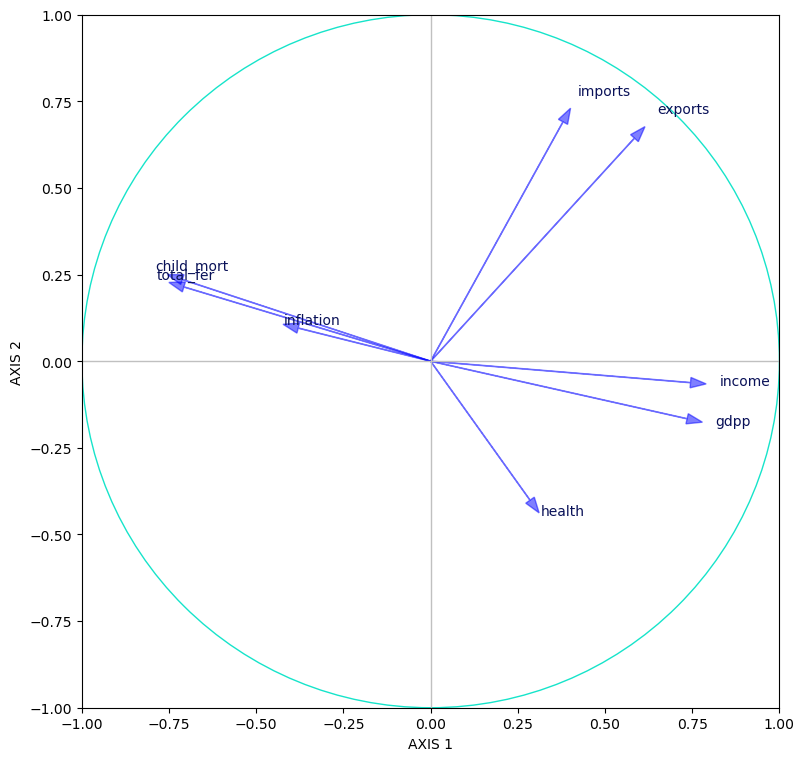

In [11]:
sqrt_eigval = np.sqrt(pca.explained_variance_)

corvar = np.zeros((8, 8))

for k in range(8):

    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

# corvar



fig, axes = plt.subplots(figsize=(9, 9))

axes.set_xlim(-1, 1)

axes.set_ylim(-1, 1)

# display of labels (variable names)

for j in range(8):

    plt.annotate(df.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')

    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9,

              alpha=0.5, head_width=0.03, color='b')



# add axes

plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)

plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)



cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)

axes.add_artist(cercle)

plt.xlabel('AXIS 1')

plt.ylabel('AXIS 2')

plt.show()


In [12]:
q = [0, 0.33, 0.66, 1]



lifex = pd.qcut(life, q)



lifex.value_counts()

life_expec
(68.134, 76.0]                  56
(76.0, 82.8]                    56
(32.099000000000004, 68.134]    55
Name: count, dtype: int64

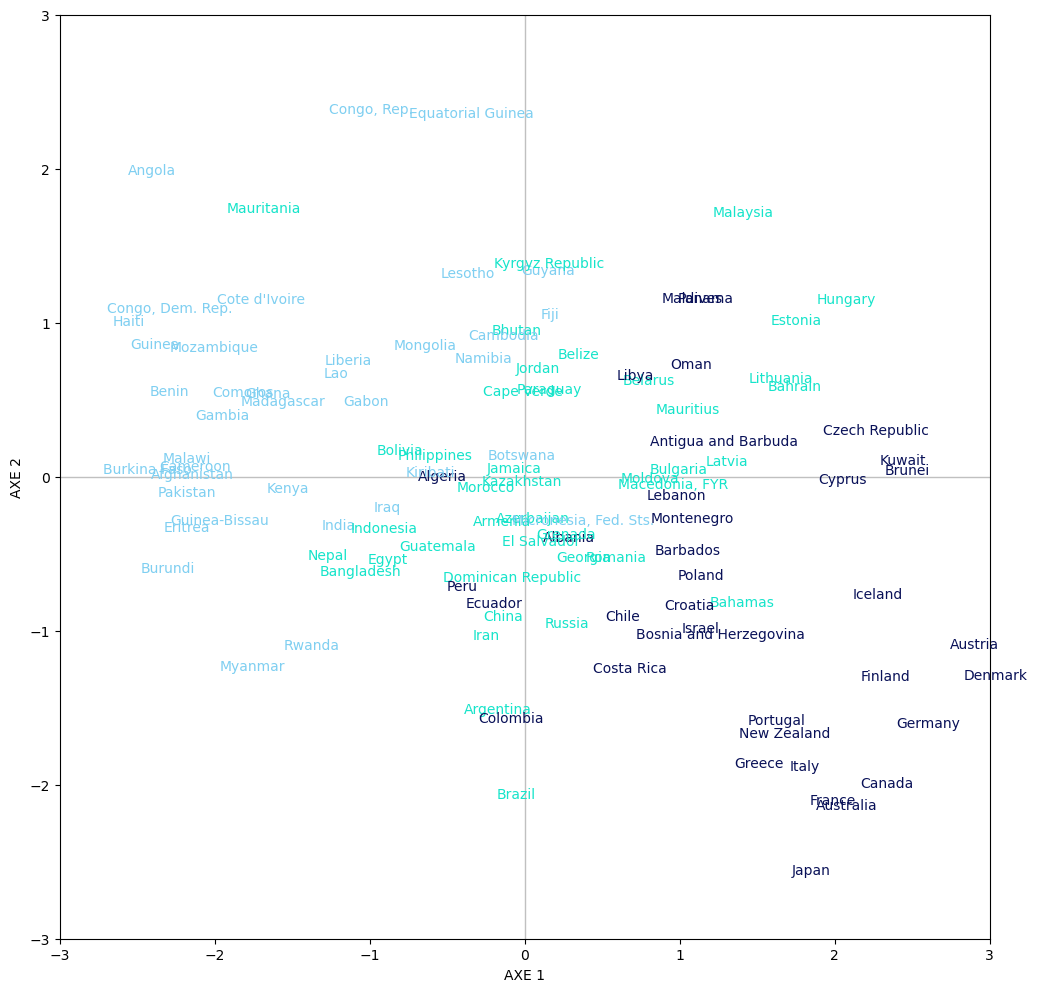

In [13]:
#positioning of individuals in the foreground

fig, axes = plt.subplots(figsize=(12,12))

axes.set_xlim(-3,3) #same limits on the x-axis

axes.set_ylim(-3,3) #and on the y-axis

#placement of observation labels

for i in range(127):

    if life[i] in lifex.cat.categories[0]:

        plt.annotate(df.index[i],(Coord[i,0],Coord[i,1]), color='#7FCFF1')

    elif life[i] in lifex.cat.categories[1]:

        plt.annotate(df.index[i],(Coord[i,0],Coord[i,1]), color='#16E4CA')

    else:

        plt.annotate(df.index[i],(Coord[i,0],Coord[i,1]), color='#091158')

            

#add axes

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)

plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.xlabel('AXE 1')

plt.ylabel('AXE 2')

#display

plt.show()